In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (accuracy_score)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
data_diabetes = pd.read_csv('/content/diabetes.csv')
data_acoustic = pd.read_csv('/content/Acoustic Features.csv')

In [ ]:
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data_acoustic.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
data_acoustic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

###Normalizando a variável resultado do dataframe Acoustic Features

In [ ]:
le = LabelEncoder()
data_acoustic['Class'] = le.fit_transform(data_acoustic['Class'])
data_acoustic.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
X_data_acoustic = data_acoustic.drop(['Class'], axis=1).values
y_data_acoustic = data_acoustic['Class'].values

X_data_diabetes = data_diabetes.drop(['Outcome'], axis=1).values
y_data_diabetes = data_diabetes['Outcome'].values

###Separando os conjuntos de dados em treino e teste

In [ ]:
X_train_data_acoustic, X_test_data_acoustic, y_train_data_acoustic, y_test_data_acoustic = train_test_split(X_data_acoustic, y_data_acoustic, test_size=0.3, random_state=5)

X_train_data_diabetes, X_test_data_diabetes, y_train_data_diabetes, y_test_data_diabetes = train_test_split(X_data_diabetes, y_data_diabetes, test_size=0.3, random_state=5)

###Normalizando os treinos e testes

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_data_acoustic)

X_train_data_acoustic = scaler.transform(X_train_data_acoustic)
X_test_data_acoustic = scaler.transform(X_test_data_acoustic)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_data_diabetes)

X_train_data_diabetes = scaler.transform(X_train_data_diabetes)
X_test_data_diabetes = scaler.transform(X_test_data_diabetes)

###KNN Acoustic Features

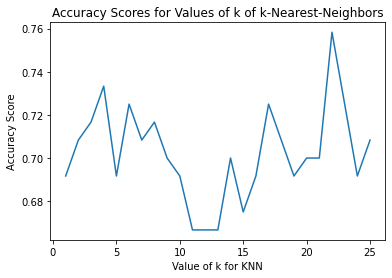

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train_data_acoustic, y_train_data_acoustic)
    y_pred = knn.predict(X_test_data_acoustic)
    scores.append(metrics.accuracy_score(y_test_data_acoustic, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

###Métricas

In [ ]:
accuracy_score(y_test_data_acoustic,y_pred)

0.7083333333333334

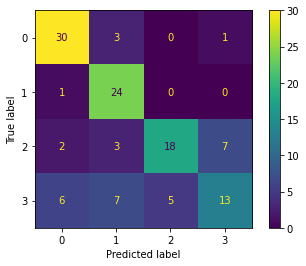

In [ ]:
cm = confusion_matrix(y_test_data_acoustic, y_pred)
ConfusionMatrixDisplay(cm).plot()

###KNN Diabetes

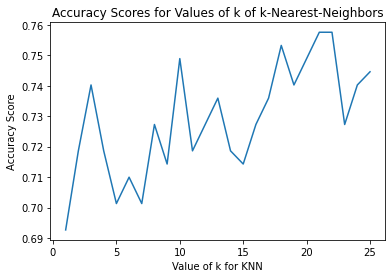

In [ ]:
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train_data_diabetes, y_train_data_diabetes)
    y_pred = knn.predict(X_test_data_diabetes)
    scores.append(metrics.accuracy_score(y_test_data_diabetes, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

###Métricas

In [ ]:
accuracy_score(y_test_data_diabetes,y_pred)

0.7445887445887446

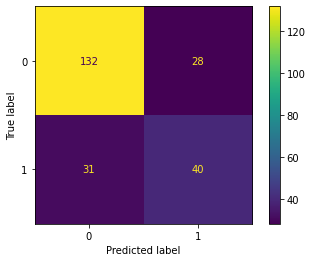

In [ ]:
cm = confusion_matrix(y_test_data_diabetes, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Árvore de Decisão - Acoustic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
data_acoustic = pd.read_csv('/content/Acoustic Features.csv')

In [ ]:
data_acoustic.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
data_acoustic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

|--- feature_48 <= 0.79
|   |--- feature_23 <= 1.81
|   |   |--- feature_18 <= 0.22
|   |   |   |--- feature_7 <= 0.16
|   |   |   |   |--- feature_17 <= 66.91
|   |   |   |   |   |--- class: sad
|   |   |   |   |--- feature_17 >  66.91
|   |   |   |   |   |--- feature_1 <= 0.58
|   |   |   |   |   |   |--- feature_20 <= 0.02
|   |   |   |   |   |   |   |--- class: angry
|   |   |   |   |   |   |--- feature_20 >  0.02
|   |   |   |   |   |   |   |--- class: relax
|   |   |   |   |   |--- feature_1 >  0.58
|   |   |   |   |   |   |--- feature_22 <= 7064.69
|   |   |   |   |   |   |   |--- class: sad
|   |   |   |   |   |   |--- feature_22 >  7064.69
|   |   |   |   |   |   |   |--- class: relax
|   |   |   |--- feature_7 >  0.16
|   |   |   |   |--- feature_5 <= -0.28
|   |   |   |   |   |--- feature_3 <= 84.76
|   |   |   |   |   |   |--- class: angry
|   |   |   |   |   |--- feature_3 >  84.76
|   |   |   |   |   |   |--- class: sad
|   |   |   |   |--- feature_5 >  -0.28
|   |   |   

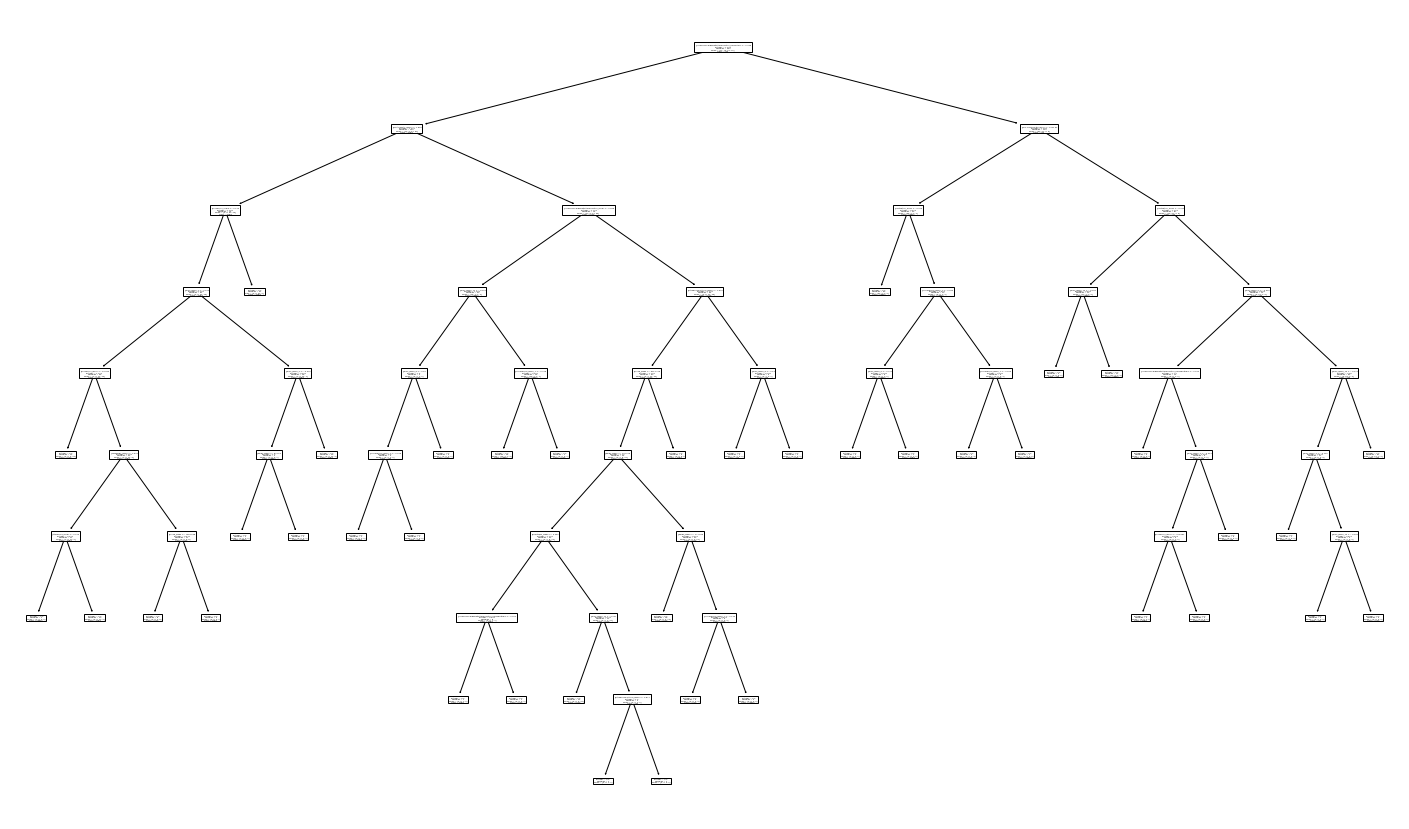

In [ ]:
colunas = data_acoustic.columns.drop('Class')

X = data_acoustic[colunas].values
y = data_acoustic['Class'].values


X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                            y, train_size=0.7, test_size=0.3)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_treino, y_treino)

y_pred = clf.predict(X_teste)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf,
                   feature_names=colunas,
                   class_names=['happy', 'sad', 'angry', 'relax'],
                   filled=False)

plt.show()


In [ ]:
X.shape, y.shape, X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((400, 50), (400,), (280, 50), (280,), (120, 50), (120,))

### Importando métricas do Sklearn

In [ ]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

### Acuracidade

In [ ]:
accuracy_score(y_teste,y_pred)

0.65

### Matriz Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

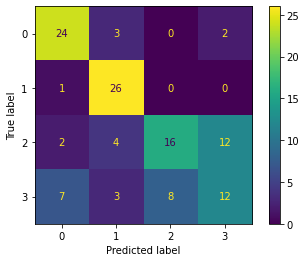

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Árvore de Decisão - Diabetes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
data_diabetes = pd.read_csv('/content/diabetes.csv')
data_acoustic = pd.read_csv('/content/Acoustic Features.csv')

In [ ]:
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


|--- feature_1 <= 127.50
|   |--- feature_5 <= 26.35
|   |   |--- feature_0 <= 9.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  9.50
|   |   |   |--- feature_7 <= 30.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  30.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  26.35
|   |   |--- feature_7 <= 30.50
|   |   |   |--- feature_5 <= 32.25
|   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  32.25
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_5 <= 45.35
|   |   |   |   |   |   |--- feature_3 <= 25.50
|   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  0.13
|   |   | 

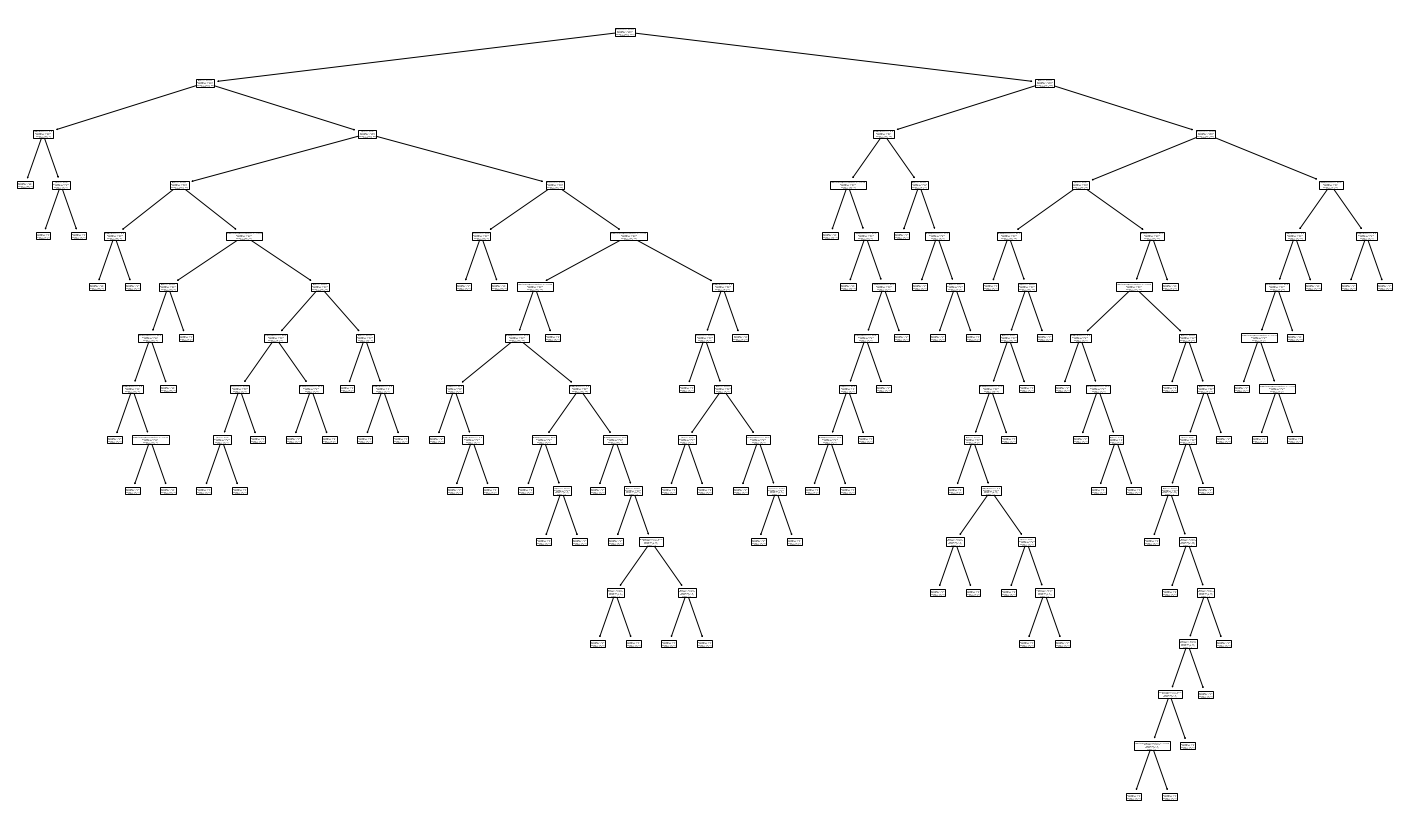

In [ ]:
colunas = data_diabetes.columns.drop('Outcome')

X = data_diabetes[colunas].values
y = data_diabetes['Outcome'].values


X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                            y, train_size=0.7, test_size=0.3)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_treino, y_treino)

y_pred = clf.predict(X_teste)

text_representation = tree.export_text(clf)
print(text_representation)


fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf,
                   feature_names=colunas,
                   class_names=['0','1'],
                   filled=False)

plt.show()


In [ ]:
X.shape, y.shape, X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((768, 8), (768,), (537, 8), (537,), (231, 8), (231,))

### Importando métricas do Sklearn

In [ ]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

### Acuracidade

In [ ]:
accuracy_score(y_teste,y_pred)

0.7229437229437229

### Matriz Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

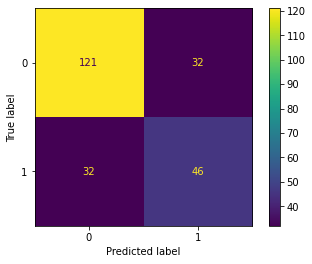

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()